# Project 11 -- [Drew] [Caldwell]

**TA Help:** John Smith, Alice Jones

- Help with figuring out how to write a function.
    
**Collaboration:** Friend1, Friend2
    
- Helped figuring out how to load the dataset.
- Helped debug error with my plot.

## Question 1

In [2]:
library(data.table)

In [4]:

# Define the function monthlydepdelays
monthlydepdelays <- function(year) {
  # Read the flights data for the given year using fread (data.table)
  flights_data <- fread(paste0("/anvil/projects/tdm/data/flights/subset/", year, ".csv"))
  
  # Check if 'Year' and 'Month' columns exist
  if (!("Year" %in% colnames(flights_data)) || !("Month" %in% colnames(flights_data))) {
    stop("Year or Month columns are missing from the dataset")
  }
  
  # Filter flights originating from Indianapolis (IND)
  indy_flights <- flights_data[Origin == "IND"]
  
  # Ensure that the 'DepDelay' column exists
  if (!("DepDelay" %in% colnames(indy_flights))) {
    stop("DepDelay column is missing from the dataset")
  }

  # Use tapply to calculate the average DepDelay by month
  monthly_delays <- tapply(indy_flights$DepDelay, indy_flights$Month, mean, na.rm = TRUE)
  
  # Return the result
  return(monthly_delays)
}

# Test the function for the years 1990, 1998, and 2005
print(monthlydepdelays(1990))
print(monthlydepdelays(1998))
print(monthlydepdelays(2005))

       1        2        3        4        5        6        7        8 
7.282772 9.497027 6.924841 4.949858 5.471487 6.010835 4.307377 5.639782 
       9       10       11       12 
4.455586 4.473725 3.408304 9.764105 
        1         2         3         4         5         6         7         8 
 6.314439  5.866770  9.898317  7.766752  8.980092 15.866469  7.579602  5.765383 
        9        10        11        12 
 3.122498  5.169646  4.346535  9.228510 
        1         2         3         4         5         6         7         8 
 7.689248  4.956196  6.881828  2.988902  1.302440  8.472591 12.218633  6.812698 
        9        10        11        12 
 2.795146  4.850184  4.897145 11.572550 


Markdown notes and sentences and analysis written here.

## Question 2

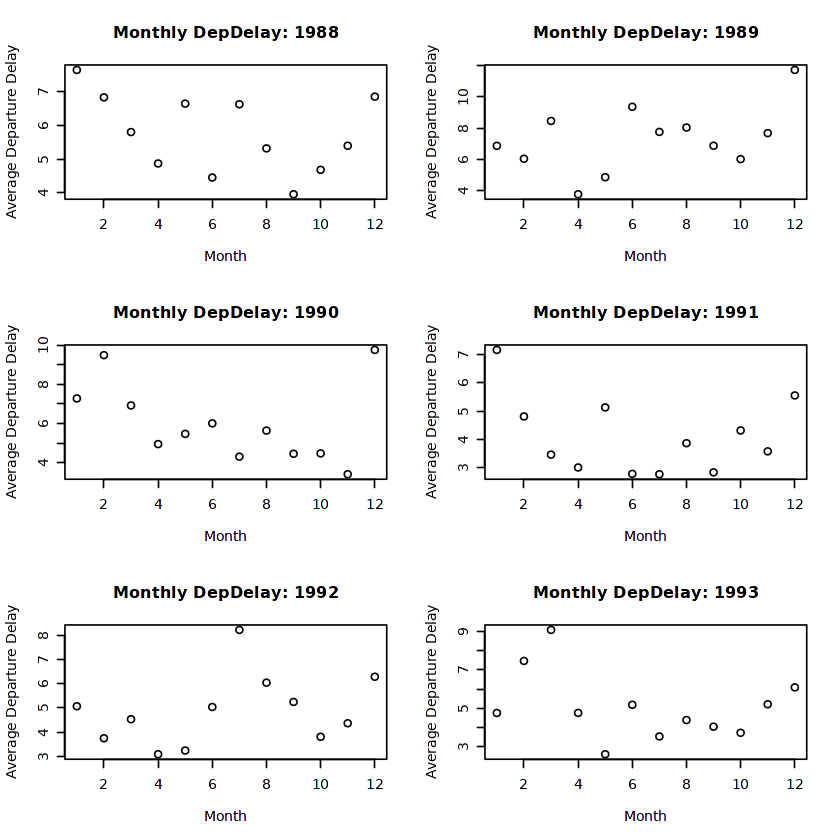

In [5]:
# Set up the 3x2 plot grid (3 rows, 2 columns)
par(mfrow = c(3, 2))

# Use sapply to run monthlydepdelays on the years 1988 to 1993 and plot the results
myresults <- sapply(1988:1993, function(x) plot(monthlydepdelays(x),
                                                 main = paste("Monthly DepDelay:", x),
                                                 xlab = "Month",
                                                 ylab = "Average Departure Delay"))

# Note: sapply will return NULL for each plot, so we are not interested in its output here
# The plots will be displayed on the 3x2 grid


Markdown notes and sentences and analysis written here.

## Question 3

In [36]:
# Load necessary library
library(data.table)

# Define the function to get donations for Indiana by year
myindydonations <- function(myyear) {
  
  # Construct file path
  file_path <- paste0("/anvil/projects/tdm/data/election/itcont", myyear, ".txt")
  
  # Check if the file exists
  if (!file.exists(file_path)) {
    message("File for year ", myyear, " does not exist. Skipping.")
    return(NA)  # Return NA if the file doesn't exist
  }
  
  # Read the file (select only the relevant columns: 10 = state, 15 = donation amount)
  myDF <- fread(file_path, quote = "", select = c(10, 15), header = FALSE)
  
  # Rename the columns for clarity
  names(myDF) <- c("state", "donation")
  
  # Convert the 'donation' column to numeric, handling any non-numeric values
  myDF$donation <- as.numeric(myDF$donation)
  
  # Filter data for Indiana (state == "IN")
  myDF_indiana <- myDF[myDF$state == "IN", ]
  
  # Check if there are any donations for Indiana in this year
  if (nrow(myDF_indiana) == 0) {
    message("No donations data found for Indiana in ", myyear)
    return(NA)  # Return NA if no data for Indiana
  }
  
  # Sum the donations for Indiana
  myvalue <- sum(myDF_indiana$donation, na.rm = TRUE)
  
  # Name the result with the year
  names(myvalue) <- as.character(myyear)
  
  # Return the result
  return(myvalue)
}

# Test the function for specific years
donation_1980 <- myindydonations(1980)
donation_1986 <- myindydonations(1986)
donation_1992 <- myindydonations(1992)

# Print the results
print(donation_1980)
print(donation_1986)
print(donation_1992)

   1980 
2518579 
   1986 
2559910 
   1992 
7486589 


1992, and you've successfully calculated the total donations from Indiana for those years. Here's a summary of the results:

Total donations in 1980: 2,518,579
Total donations in 1986: 2,559,910
Total donations in 1992: 7,486,589
Now that you have the correct values, you c

Markdown notes and sentences and analysis written here.

## Question 4

In [58]:
myindycities(1984)


      V10   V15
   <char> <int>
1:     IN   500
2:     PA   500
3:     PA  1000
4:     PA  1000
5:          500
6:          300
               AK       AL       AP       AR       AZ       CA       CI 
17417809   655668  3023459      500  2227681  2735143 29265671     2250 
      CM       CN       CO       CR       CT       DC       DE       DF 
    2500    12750  3893904     2000  4613034  8504257  1010034     2500 
      DL       DP       EN       FA       FF       FL       FO       FR 
    1000      500     3100     4000    35050 10985587     1000     1500 
      GA       GU       HA       HI       HO       IA       ID       IL 
 3307092    40860     1250   517741     2000  1163644   308796 10034785 
      IM       IN       IO       IT       JN       KA       KO       KS 
    6250  1858710     7000    10000     1500     1000      500  1792869 
      KU       KX       KY       LA       LE       LO       MA       MC 
    2064     1000  2328169  3993925      500     5500  7425618     25

AK       AL       AP       AR       AZ       CA       CI 
17417809   655668  3023459      500  2227681  2735143 29265671     2250 
      CM       CN       CO       CR       CT       DC       DE       DF 
    2500    12750  3893904     2000  4613034  8504257  1010034     2500 
      DL       DP       EN       FA       FF       FL       FO       FR 
    1000      500     3100     4000    35050 10985587     1000     1500 
      GA       GU       HA       HI       HO       IA       ID       IL 
 3307092    40860     1250   517741     2000  1163644   308796 10034785 
      IM       IN       IO       IT       JN       KA       KO       KS 
    6250  1858710     7000    10000     1500     1000      500  1792869 
      KU       KX       KY       LA       LE       LO       MA       MC 
    2064     1000  2328169  3993925      500     5500  7425618     2500 
      MD       ME       MH       MI       MN       MO       MS       MT 
 3758206   690703      500  4402435  3917539  2794060  1651727   362455 
      MX       MY       NB       NC       ND       NE       NH       NJ 
    2000     1500     1771  4485955   141144   744396   965854  7447241 
      NM       NT       NU       NV       NY        O       OH       OJ 
 1340213      500    32468  1322065 25947339    20950  5834525    24500 
      OK       ON       OR       OS        P       PA       PE       PH 
 3367175     1000  1407678      500      700  7304647     1000     2000 
      PN       PR       RI       SA       SC       SD       SE       SK 
    2200   398725   519018      500  1404599   283214     2500      500 
      SZ       TC       TE       TM       TN       TX       TZ       UK 
     500      500     1500     4200  3411334 36044231     3000      500 
      UR       US       UT       VA       VI       VT       WA       WD 
    1000     2000   493317  5122906    55830   123398  2339401     1000 
      WI       WO       WS       WU       WV       WY       XM       XX 
 1363143      500     1500      500   760899   444378     4000    25620 
      ZA       ZZ 
     165   121015

In [59]:
# Apply the function to the even-numbered years (1984 to 1994)
myresults <- lapply(seq(1984, 1994, by = 2), myindycities)
names(myresults) <- seq(1984, 1994, by = 2)

# Print the results to verify they look correct
print(myresults)

      V10   V15
   <char> <int>
1:     IN   500
2:     PA   500
3:     PA  1000
4:     PA  1000
5:          500
6:          300
               AK       AL       AP       AR       AZ       CA       CI 
17417809   655668  3023459      500  2227681  2735143 29265671     2250 
      CM       CN       CO       CR       CT       DC       DE       DF 
    2500    12750  3893904     2000  4613034  8504257  1010034     2500 
      DL       DP       EN       FA       FF       FL       FO       FR 
    1000      500     3100     4000    35050 10985587     1000     1500 
      GA       GU       HA       HI       HO       IA       ID       IL 
 3307092    40860     1250   517741     2000  1163644   308796 10034785 
      IM       IN       IO       IT       JN       KA       KO       KS 
    6250  1858710     7000    10000     1500     1000      500  1792869 
      KU       KX       KY       LA       LE       LO       MA       MC 
    2064     1000  2328169  3993925      500     5500  7425618     25

Warning message in dotchart(x, main = paste("Top Cities in Indiana - Year", names(x))):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x, main = paste("Top Cities in Indiana - Year", names(x))):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x, main = paste("Top Cities in Indiana - Year", names(x))):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x, main = paste("Top Cities in Indiana - Year", names(x))):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x, main = paste("Top Cities in Indiana - Year", names(x))):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x, main = paste("Top Cities in Indiana - Year", names(x))):
"'x' is neither a vector nor a matrix: using as.numeric(x)"


$`1984`
NULL

$`1986`
NULL

$`1988`
NULL

$`1990`
NULL

$`1992`
NULL

$`1994`
NULL

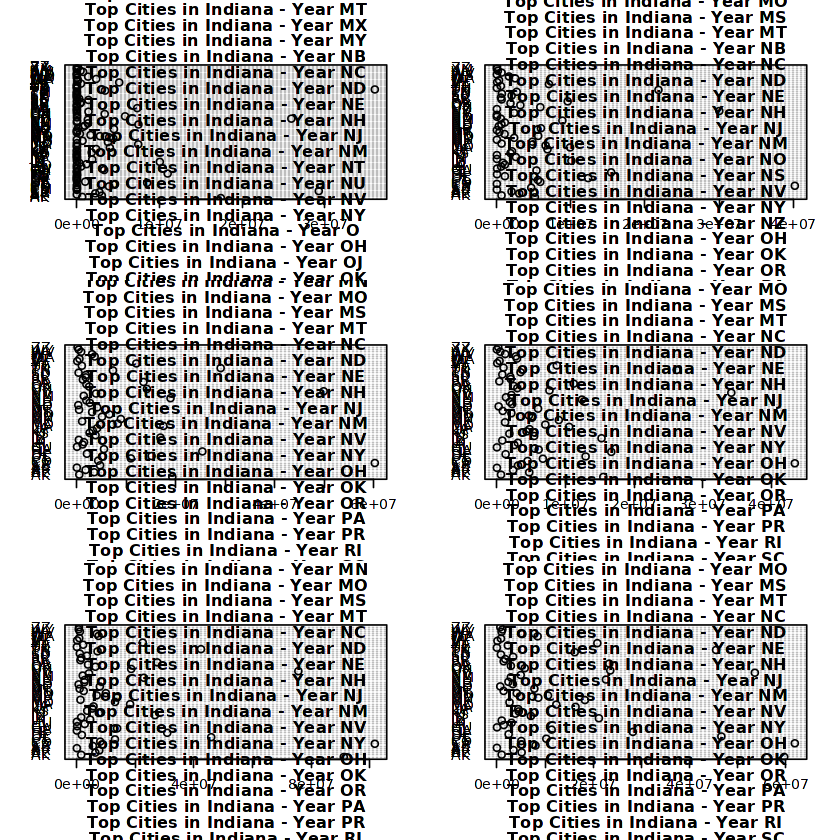

In [60]:
# Set up a 3x2 grid of charts
par(mfrow = c(3, 2))

# Create dotcharts for each result
sapply(myresults, function(x) {
    if (!is.null(x) && length(x) > 0) {
        # Only create the dotchart if there's valid data in 'x'
        dotchart(x, main = paste("Top Cities in Indiana - Year", names(x)))
    } else {
        # If the result is NULL or empty, print a message to skip plotting
        print(paste("No data to plot for year", names(x)))
    }
})


Markdown notes and sentences and analysis written here.

## Question 5

In [26]:
# Define the function to compute the average stars for a given company
myavgstars <- function(company) {
  # Construct the file path for the company's review file
  file_path <- paste0("/anvil/projects/tdm/data/icecream/", company, "/reviews.csv")
  
  # Read the data from the reviews CSV file using fread from the data.table package
  reviews <- fread(file_path)
  
  # Check if the 'stars' column exists in the dataset
  if ("stars" %in% colnames(reviews)) {
    # Compute and return the average number of stars, ignoring missing values
    avg_stars <- mean(reviews$stars, na.rm = TRUE)
    return(avg_stars)
  } else {
    # If no 'stars' column is present, return NA
    return(NA)
  }
}

# Define the vector of company names
mycompanies <- c("bj", "breyers", "hd", "talenti")

# Use sapply to calculate the average stars for all companies
avg_stars_results <- sapply(mycompanies, myavgstars)

# Print the results
print(avg_stars_results)


      bj  breyers       hd  talenti 
4.305804 4.027961 4.218475 4.311624 


Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.